In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_preprocessed_data.csv') #load a dataset

In [3]:
print("\n--- Summary Statistics ---")
print(df.describe(include='all'))   #summary statistics 


--- Summary Statistics ---
        sepal_length   sepal_width  petal_length  petal_width  \
count   1.460000e+02  1.460000e+02  1.460000e+02   146.000000   
unique           NaN           NaN           NaN          NaN   
top              NaN           NaN           NaN          NaN   
freq             NaN           NaN           NaN          NaN   
mean    4.866731e-17  3.406712e-16  4.866731e-17     0.000000   
std     1.003442e+00  1.003442e+00  1.003442e+00     1.003442   
min    -1.872943e+00 -2.125465e+00 -1.603307e+00    -1.477867   
25%    -9.105154e-01 -6.018092e-01 -1.260664e+00    -1.213930   
50%    -6.839165e-02 -9.392398e-02  3.383413e-01     0.105756   
75%     6.534287e-01  6.679039e-01  7.380925e-01     0.765598   
max     2.457980e+00  2.445502e+00  1.766024e+00     1.689378   

       species_versicolor species_virginica  
count                 146               146  
unique                  2                 2  
top                 False             False  
freq   

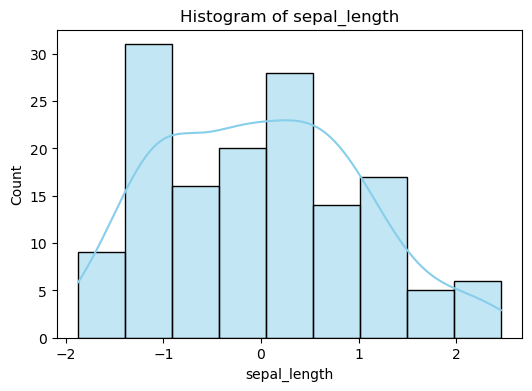

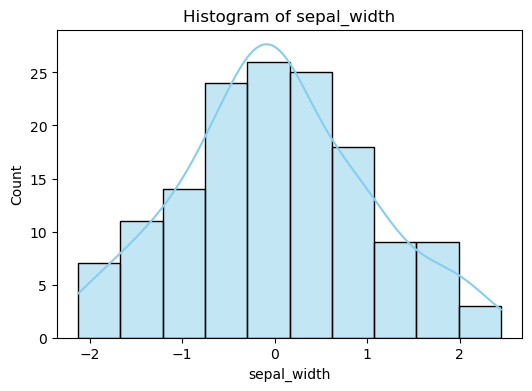

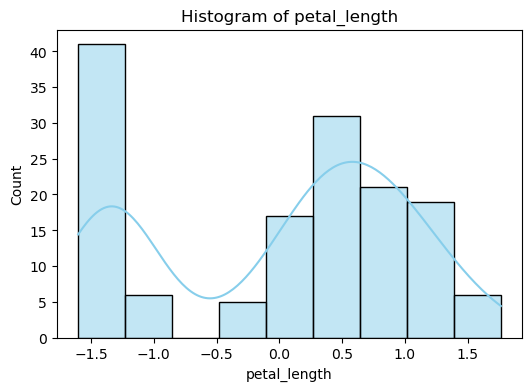

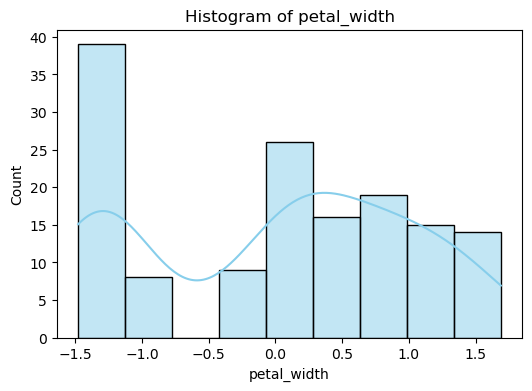

In [23]:
numeric_cols = df.select_dtypes(include='number').columns   #histogram numeric feature
for col in numeric_cols:
    plt.figure(figsize=(6,4),)
    sns.histplot(df[col],color='skyblue', kde=True)
    plt.title(f'Histogram of {col}')
    plt.savefig(f'{col}_histogram.png')
  

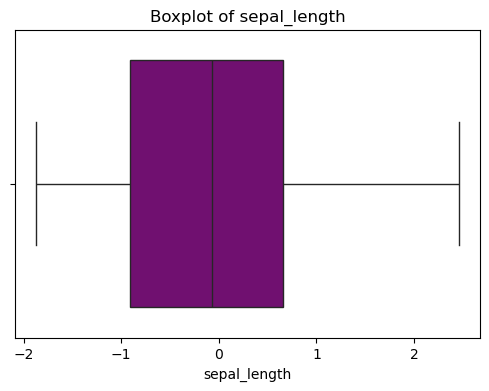

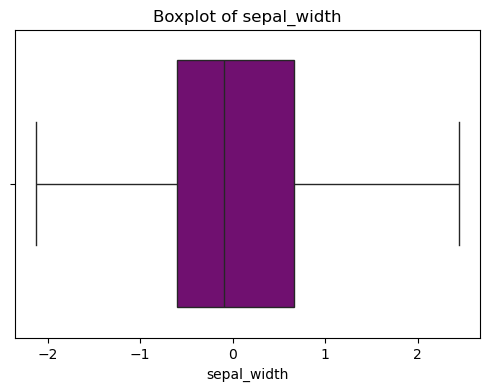

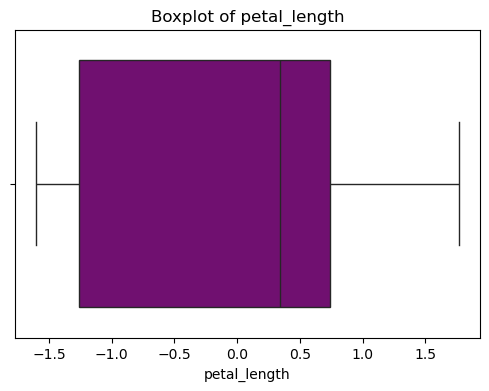

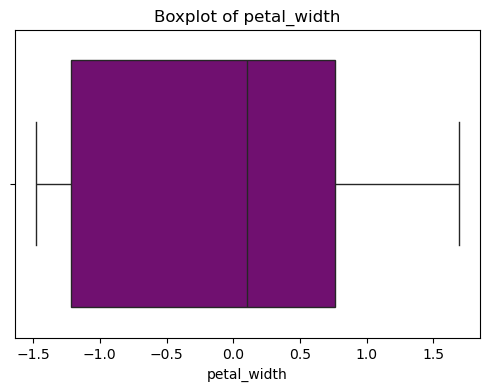

In [20]:
for col in numeric_cols:   #Box Plots for numeric features 
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='Purple')
    plt.title(f'Boxplot of {col}')
    plt.savefig(f'{col}_boxplot.png')
  

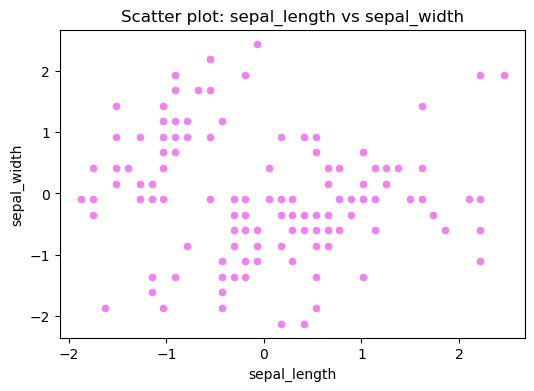

In [22]:
if len(numeric_cols) > 1:         #Scatter Plot (for first two numeric cols, if at least two exist) 
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]],color='violet')
    plt.title(f'Scatter plot: {numeric_cols[0]} vs {numeric_cols[1]}')
    plt.savefig(f'scatter_{numeric_cols[0]}_vs_{numeric_cols[1]}.png')
    


--- Correlation Matrix ---
                    sepal_length  sepal_width  petal_length  petal_width  \
sepal_length            1.000000    -0.113977      0.879374     0.822577   
sepal_width            -0.113977     1.000000     -0.397123    -0.329782   
petal_length            0.879374    -0.397123      1.000000     0.961755   
petal_width             0.822577    -0.329782      0.961755     1.000000   
species_versicolor      0.084011    -0.453515      0.189945     0.105792   
species_virginica       0.634796    -0.115433      0.718958     0.767766   

                    species_versicolor  species_virginica  
sepal_length                  0.084011           0.634796  
sepal_width                  -0.453515          -0.115433  
petal_length                  0.189945           0.718958  
petal_width                   0.105792           0.767766  
species_versicolor            1.000000          -0.512934  
species_virginica            -0.512934           1.000000  


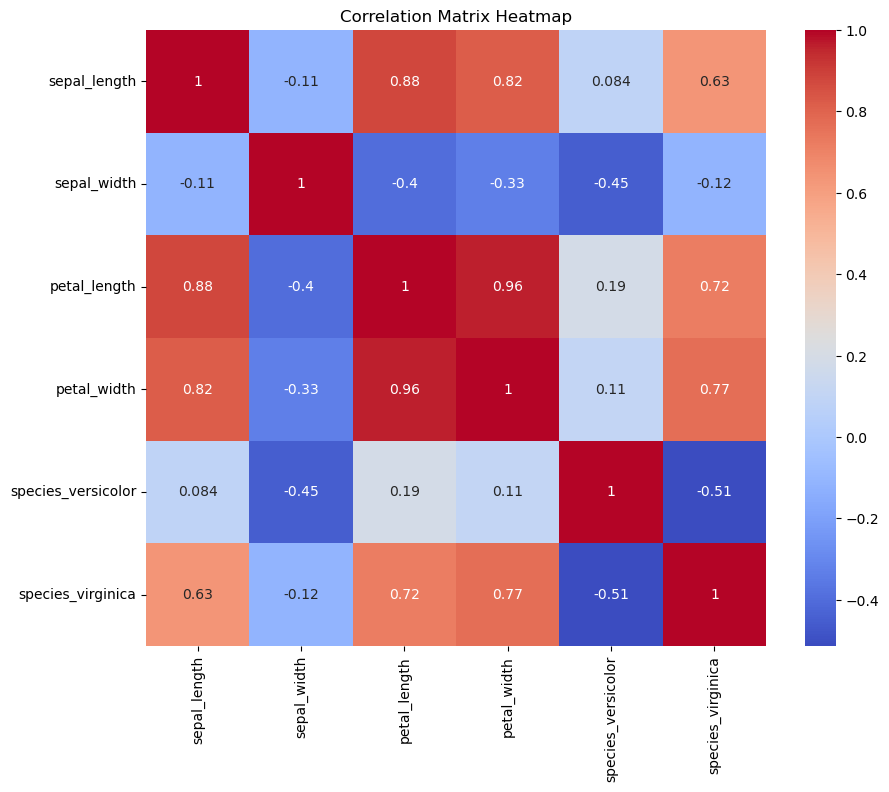

In [26]:
corr_matrix = df.corr(numeric_only=True)    #correlation matrix
print("\n--- Correlation Matrix ---")
print(corr_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, color='Red', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_heatmap.png')


In [16]:
cat_cols = df.select_dtypes(include=['object']).columns   #Categorical Variable Countplots
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[col])
    plt.title(f'Countplot of {col}')
    plt.savefig(f'{col}_countplot.png')
   

In [11]:
with open('eda_report.txt', 'w') as f:
    f.write("--- Summary Statistics ---\n")
    f.write(str(df.describe(include='all')))
    f.write("\n\n--- Correlation Matrix ---\n")
    f.write(str(corr_matrix))
    f.write("\n\n--- Key Insights ---\n")
    # Example insights
    high_corr = (corr_matrix.abs() > 0.7) & (corr_matrix.abs() < 1.0)
    strongly_corr_pairs = [(c1, c2) for c1 in corr_matrix.columns for c2 in corr_matrix.columns
                           if high_corr.loc[c1, c2] and c1 != c2]
    if strongly_corr_pairs:
        f.write("Strong correlations found between pairs:\n")
        for pair in strongly_corr_pairs:
            f.write(f" - {pair[0]} & {pair[1]}: corr={corr_matrix.loc[pair[0], pair[1]]}\n")
    else:
        f.write("No strong correlations (> 0.7) found between numeric features.\n")
    f.write("\n")

print(" EDA complete. Plots saved as PNGs, and the report as eda_report.txt.")


 EDA complete. Plots saved as PNGs, and the report as eda_report.txt.
